Forecast the CocaCola prices and Airlines Passengers data set.

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 

Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines = pd.read_excel('Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

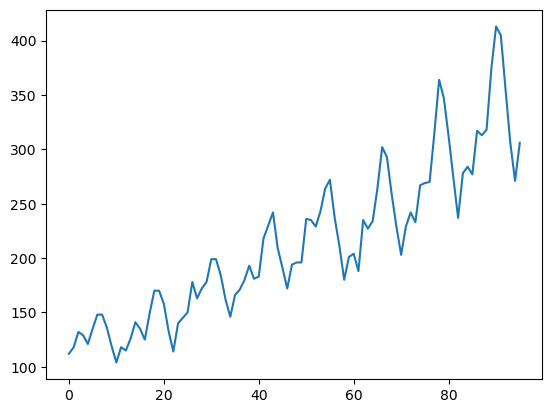

In [3]:
airlines.Passengers.plot()

<AxesSubplot:>

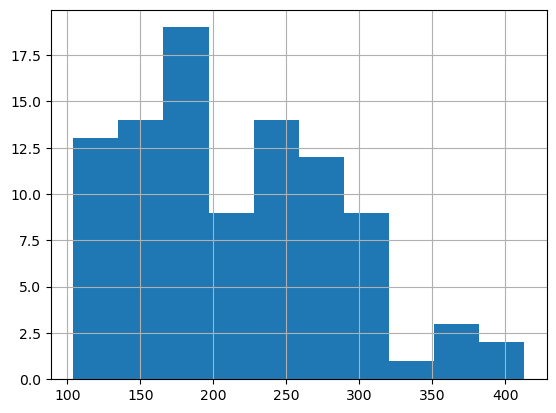

In [4]:
airlines.Passengers.hist()

<AxesSubplot:>

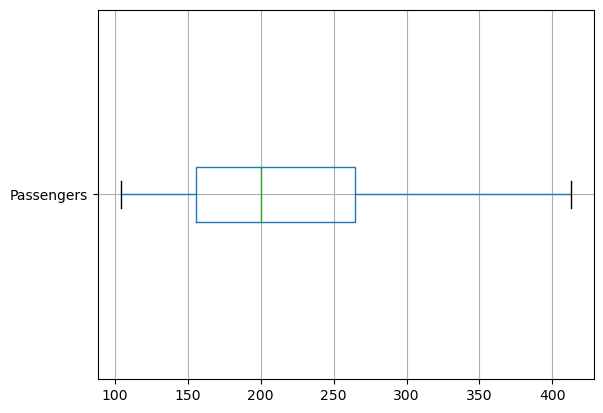

In [5]:
airlines.boxplot(vert=False)

In [6]:
airlines.Passengers.describe()

count     96.000000
mean     213.708333
std       71.918216
min      104.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      413.000000
Name: Passengers, dtype: float64

<AxesSubplot:ylabel='Density'>

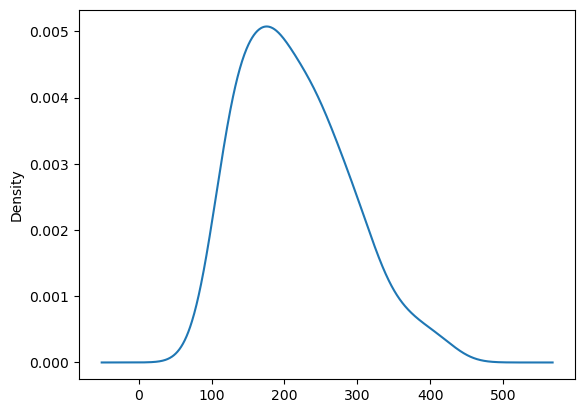

In [7]:
airlines.Passengers.plot(kind = 'kde')

In [8]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_excel('Airlines+Data.xlsx', header = 0, index_col = 0, parse_dates = True, squeeze = True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()

In [9]:
for name,group in groups:
    years[name.year]=group.values
years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

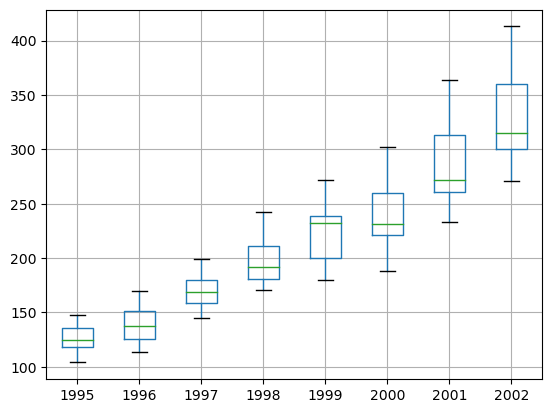

In [10]:
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

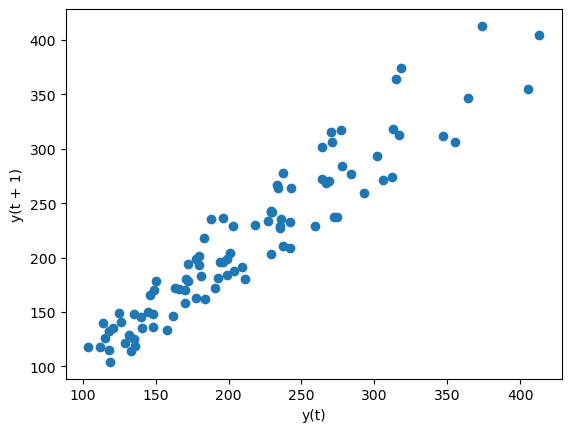

In [11]:
from pandas.plotting import lag_plot
lag_plot(series)

<Figure size 2000x1000 with 0 Axes>

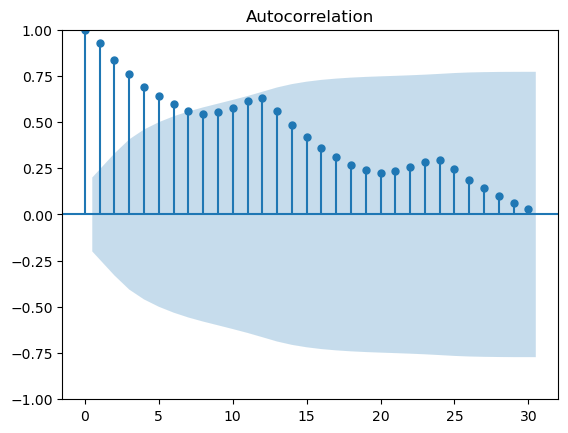

In [12]:
pyplot.figure(figsize=(20,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=30)
pyplot.show()

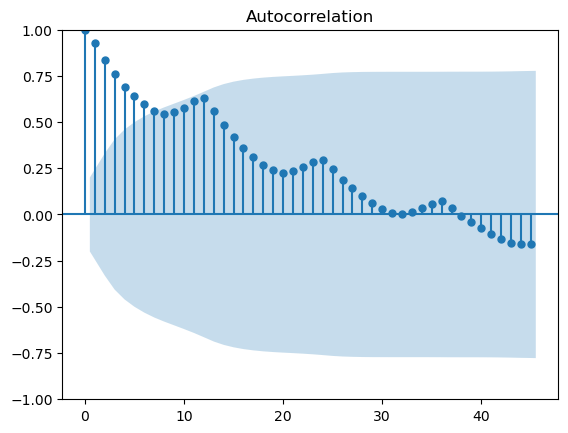

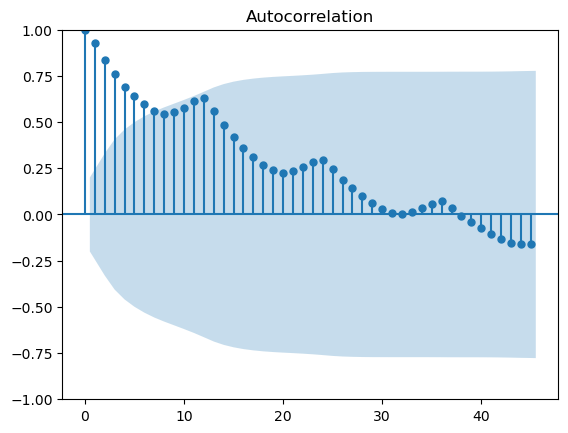

In [13]:
plot_acf(series, lags = 45)

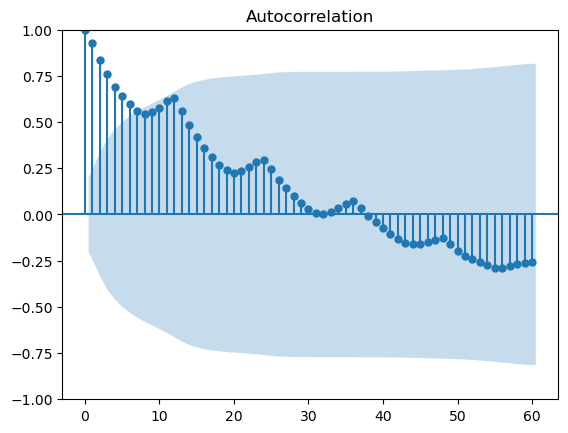

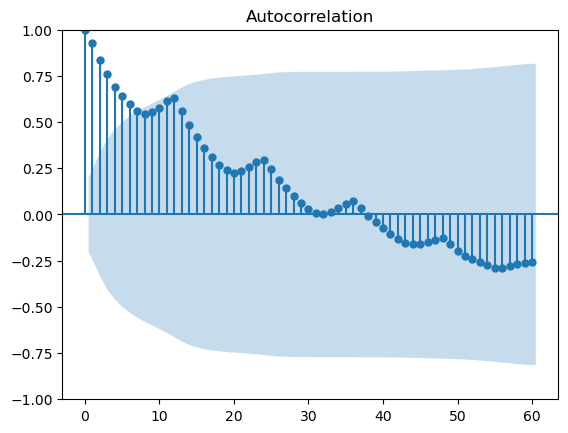

In [14]:
plot_acf(series, lags = 60)

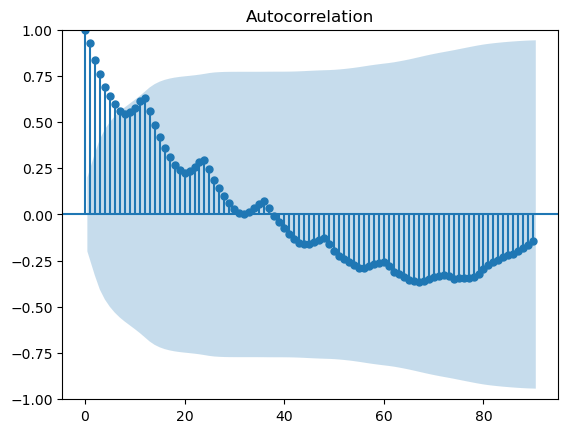

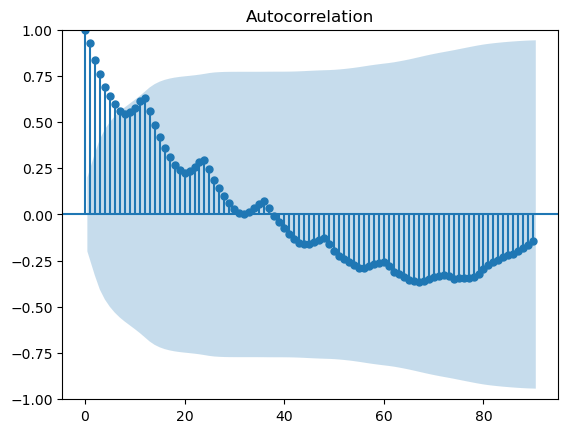

In [15]:
plot_acf(series, lags = 90)

In [16]:
Months = pd.DataFrame(pd.get_dummies(airlines['Month']))
data_dm = pd.concat([airlines,Months], axis = 1)
data_dm

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
import numpy as np
data_dm['t'] = np.arange(1,len(data_dm)+1)

In [18]:
data_dm

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,t
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,92
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,93
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,94
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,95


In [19]:
data_dm['t_square'] = data_dm['t']*data_dm['t']
data_dm['log_passengers'] = np.log(data_dm['Passengers'])

In [20]:
data_dm

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,t,t_square,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,94,8836,5.723585
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,95,9025,5.602119


In [21]:
data_dm

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,t,t_square,log_passengers
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,93,8649,5.872118
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,94,8836,5.723585
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,95,9025,5.602119


In [22]:
data_dm['month'] = data_dm.Month.dt.strftime("%b")
data_dm['year'] = data_dm.Month.dt.strftime("%y")

In [23]:
data_dm

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,t,t_square,log_passengers,month,year
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,4.718499,Jan,95
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,4,4.770685,Feb,95
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,9,4.882802,Mar,95
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,16,4.859812,Apr,95
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,5,25,4.795791,May,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,1,0,0,0,0,92,8464,6.003887,Aug,02
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,1,0,0,0,93,8649,5.872118,Sep,02
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,1,0,0,94,8836,5.723585,Oct,02
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,1,0,95,9025,5.602119,Nov,02


<AxesSubplot:xlabel='year', ylabel='month'>

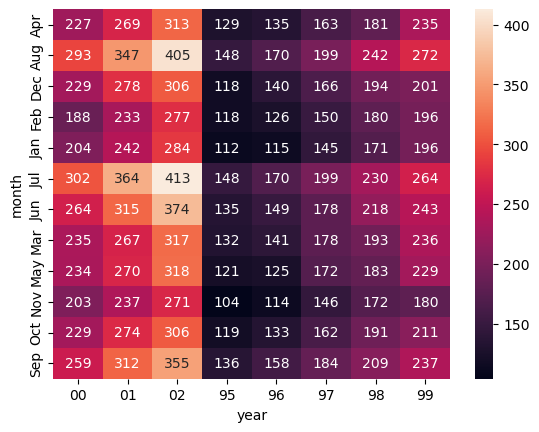

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_month = pd.pivot_table(index = 'month', columns = 'year', values = 'Passengers',data = data_dm,fill_value = 0)
sns.heatmap(heatmap_month, annot= True, fmt = 'g')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

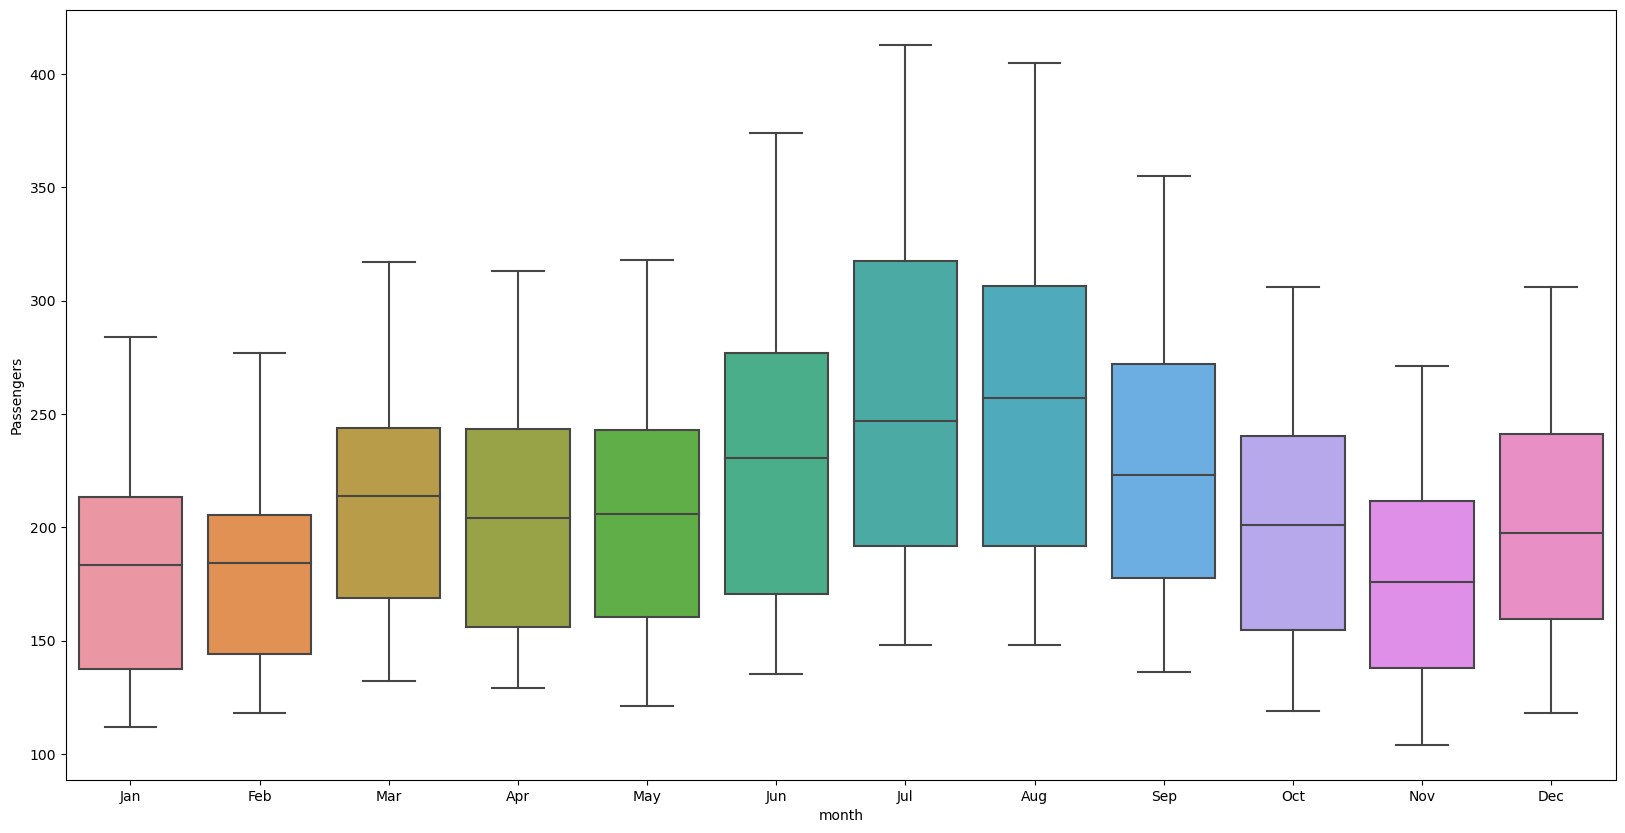

In [25]:
plt.figure(figsize = (20,10))
sns.boxplot(x='month', y = 'Passengers', data = data_dm)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

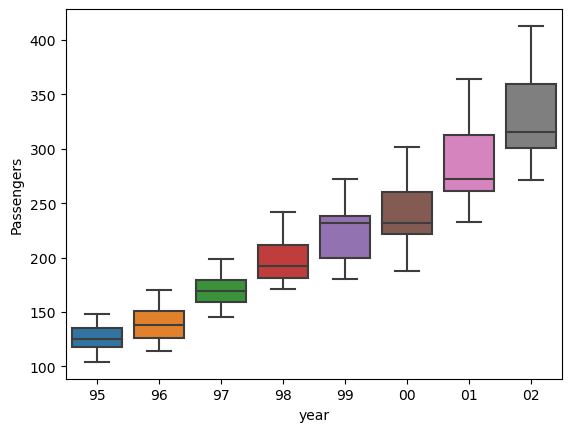

In [26]:
sns.boxplot(x='year', y='Passengers', data = data_dm)

In [27]:
data_dm.shape

(96, 103)

In [28]:
train = data_dm.head(80)
test = data_dm.tail(16)

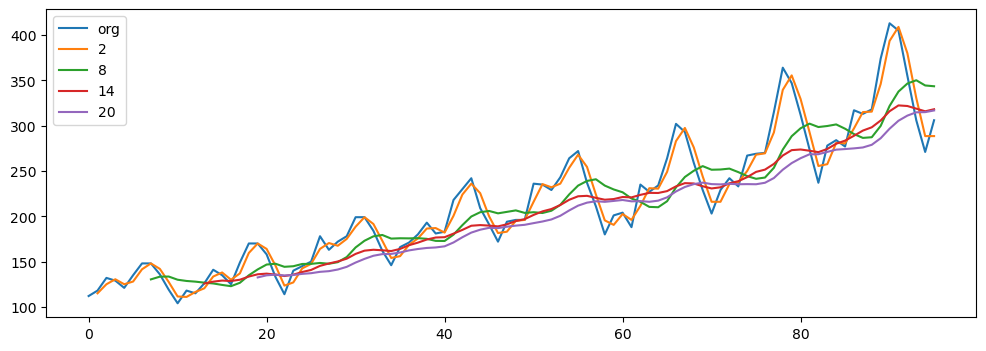

In [29]:
plt.figure(figsize=(12,4))
data_dm.Passengers.plot(label='org')
for i in range(2,24,6):
    data_dm.Passengers.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

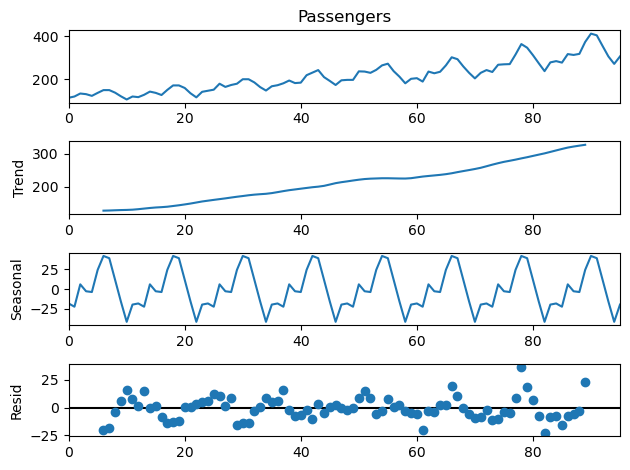

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_airlines = seasonal_decompose(data_dm.Passengers,period=12)
decompose_ts_airlines.plot()
plt.show()

In [31]:
airlines['t'] = np.arange(len(airlines))+1
airlines['t_squared'] = airlines['t']*airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])

In [32]:
airlines

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [33]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [34]:
def rmse(org,pred):
    rmse= np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Linear Model

In [35]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_linear = rmse(test.Passengers,pred_linear)
rmse_linear

47.54262406772677

# Exponential Model

In [36]:
exp_model = smf.ols('log_passengers~t', data=train).fit()
pred_exp = pd.Series(exp_model.predict(test['t']))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.79373939334308

# Quadratic Model

In [37]:
quad_model = smf.ols('Passengers~t+t_square', data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[['t','t_square']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

43.65440369584248

# Simple Exponential Method


In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
sme = MAPE(pred_ses,test.Passengers)
print("MAPE is : ", sme)
rmse_sem = rmse(test.Passengers,pred_ses)
rmse_sem

MAPE is :  11.375850554268187


50.8582166265628

# Holt Method


In [39]:
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(train['Passengers']).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
holt = MAPE(pred_hw,test.Passengers)
holt
rmse_holt = rmse(test.Passengers,pred_hw)
rmse_holt

72.00623716001783

In [40]:
hw_model = Holt(train['Passengers']).fit(smoothing_level = 0.2, smoothing_slope = 0.2)
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
mape_hw = MAPE(pred_hw, test.Passengers)
print("MAPE is : ", mape_hw)
rmse_hw = rmse(test.Passengers, pred_hw)
rmse_hw

MAPE is :  26.339724801902975


91.73021954519284

# Holts winter exponential smoothing with additive seasonality and additive trend

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add = ExponentialSmoothing(train['Passengers'],seasonal = 'add', trend = 'add', seasonal_periods = 4).fit()
pred_hwe = hwe_model_add_add.predict(start=test.index[0], end = test.index[-1])
haa = MAPE(pred_hwe, test.Passengers)
print("MAPE is :",haa)
rmse_haa = rmse(test.Passengers, pred_hwe)
rmse_haa

MAPE is : 20.612537283857204


67.45316497776686

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
hwe_model_mul_add = ExponentialSmoothing(train['Passengers'],seasonal = 'mul', trend = 'add', seasonal_periods = 4).fit()
pred_hwe_ma = hwe_model_mul_add.predict(start=test.index[0],end = test.index[-1])
hma = MAPE(pred_hwe_ma,test.Passengers)
print('MAPE is : ',hma)
rmse_hma = rmse(test.Passengers,pred_hwe_ma)
rmse_hma

MAPE is :  19.57739110500058


65.07787167804707

In [43]:
model = {'Model':pd.Series(['linear_model','Exponential_model','Quadratic_model','Simple_Exponential_model','holt_Model','Holtaa','Holtma']), 'MAPE_Values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_sem,rmse_holt,rmse_haa,rmse_hma])}

In [44]:
model = pd.DataFrame(model)

In [45]:
model.sort_values(['MAPE_Values'])

,Model,MAPE_Values
2,Quadratic_model,43.654404
1,Exponential_model,43.793739
0,linear_model,47.542624
3,Simple_Exponential_model,50.858217
6,Holtma,65.077872
5,Holtaa,67.453165
4,holt_Model,72.006237


# Building final model with least RMSE value

In [46]:
final_model = smf.ols('Passengers~t+t_squared', data = airlines).fit()
pred_final = pd.Series(final_model.predict(airlines[['t','t_squared']]))
rmse_final = rmse(airlines['Passengers'], pred_final)
rmse_final

29.59097162530025

In [47]:
airlines.head()

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [48]:
pred_df = pd.DataFrame({'Actual': airlines.Passengers,'Predicted':pred_final})

In [49]:
pred_df

,Actual,Predicted
0,112,119.158137
1,118,120.460303
2,132,121.784439
3,129,123.130544
4,121,124.498617
...,...,...
91,405,327.618598
92,355,330.919950
93,306,334.243270
94,271,337.588559


# Coca-Cola Data set

In [50]:
coca = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [51]:
coca.shape

(42, 2)

<AxesSubplot:>

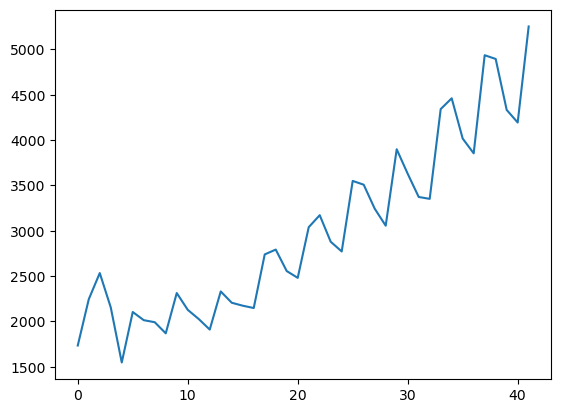

In [52]:
coca.Sales.plot()

In [53]:
coca['Quarters'] = 0
coca['Years'] = 0
for i in range(len(coca)):
    p=coca['Quarter'][i]
    coca['Quarters'][i] = p[0:2]
    coca['Years'][i] = p[3:5]

In [54]:
coca

,Quarter,Sales,Quarters,Years
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [55]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(coca['Quarters']))
coca = pd.concat([coca,Quarter_dummies],axis=1)
coca                               

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


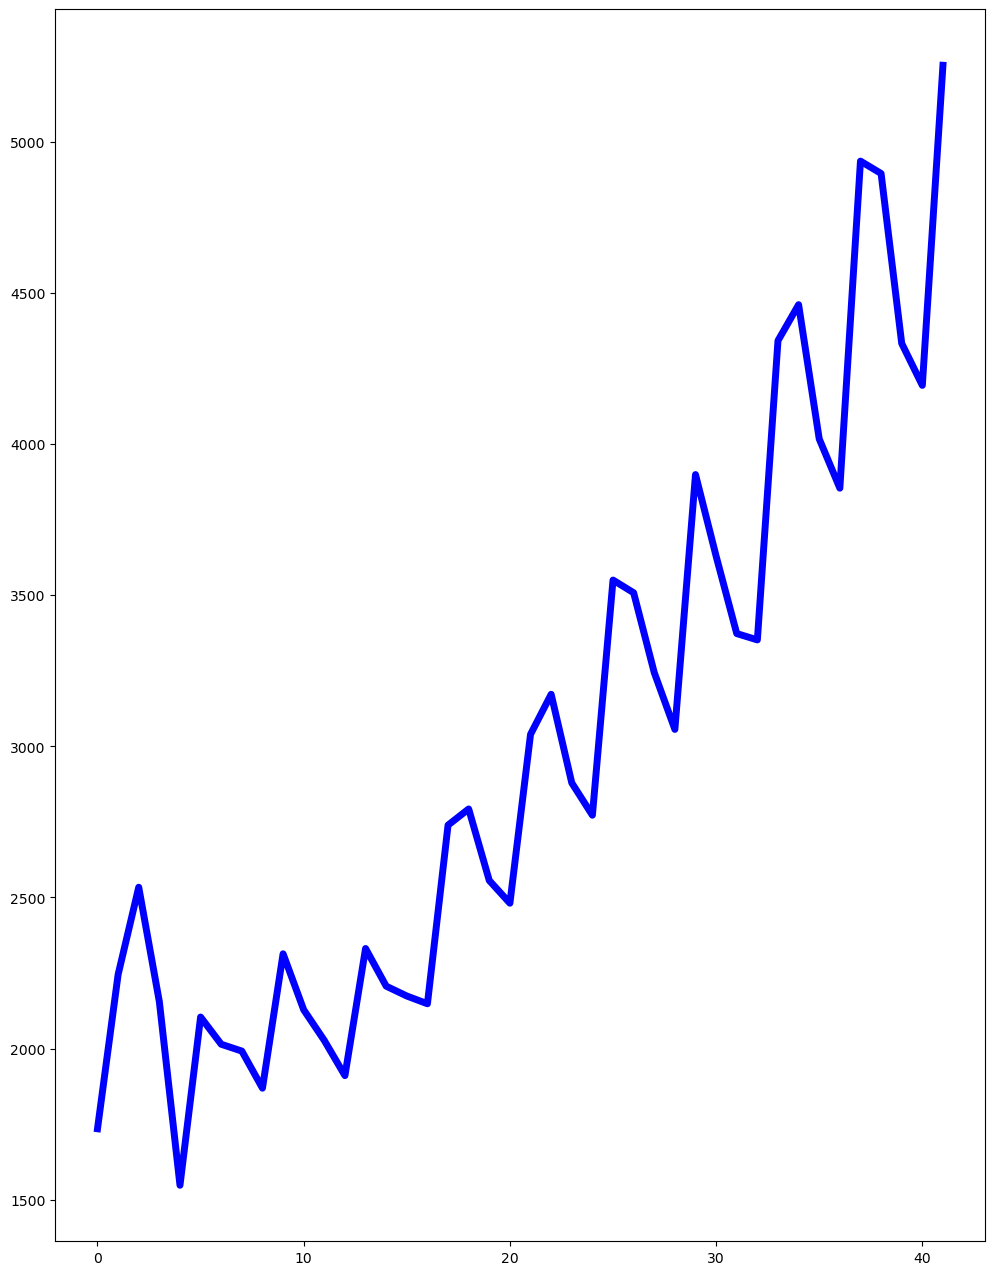

In [56]:
plt.figure(figsize = (12,16))
plt.plot(coca['Sales'], color='blue', linewidth = 5)

<AxesSubplot:xlabel='Years', ylabel='Sales'>

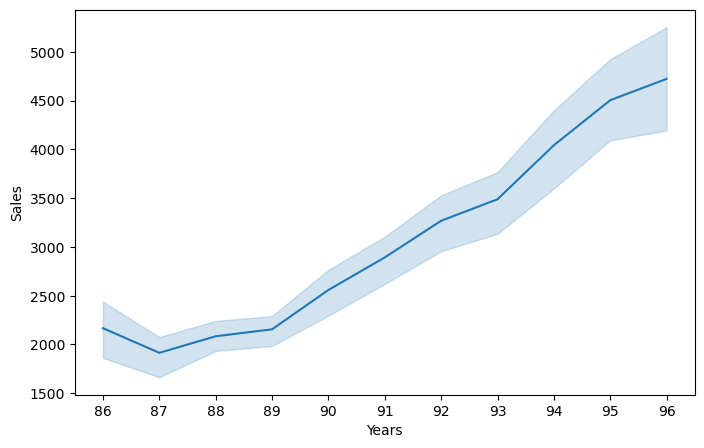

In [57]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.lineplot(x = 'Years', y= 'Sales',data = coca)

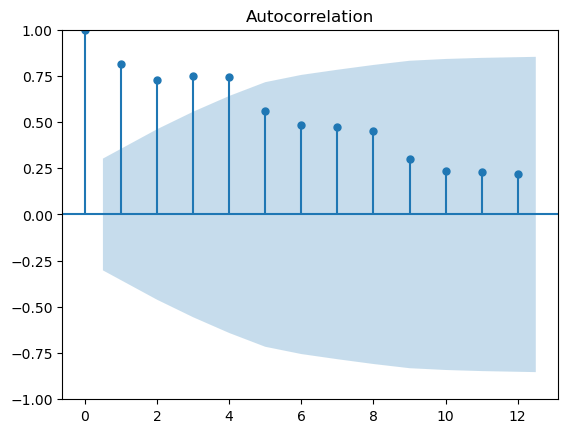

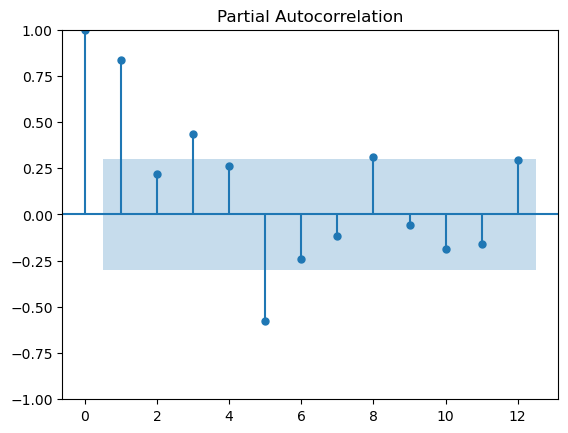

In [58]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coca.Sales, lags = 12)
tsa_plots.plot_pacf(coca.Sales, lags = 12)
plt.show()

<AxesSubplot:xlabel='Years', ylabel='Sales'>

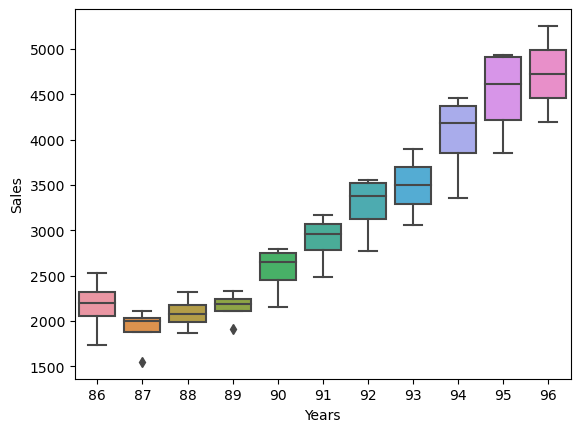

In [59]:
sns.boxplot(x='Years', y = 'Sales', data = coca)

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

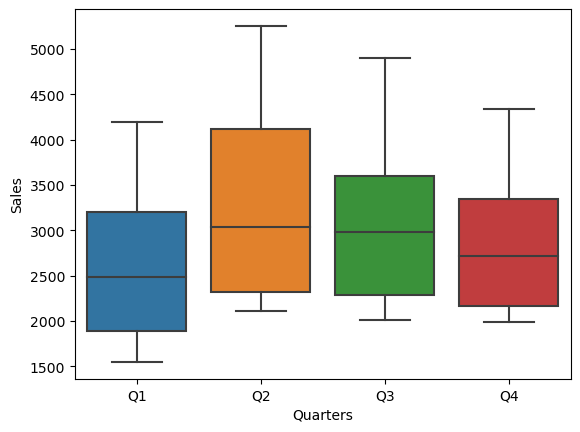

In [60]:
sns.boxplot(x='Quarters', y='Sales', data = coca)

<AxesSubplot:xlabel='Quarters', ylabel='Years'>

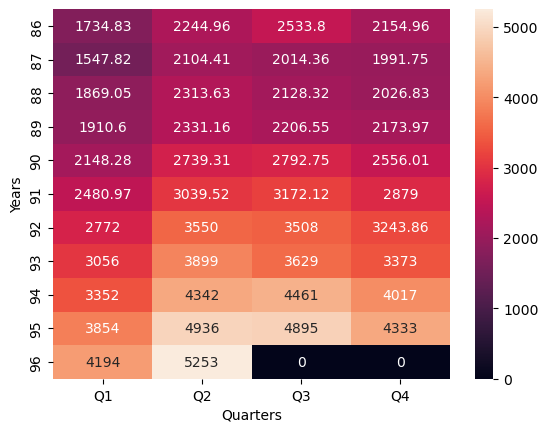

In [61]:
heatmap_coca = pd.pivot_table(index = 'Years', columns = 'Quarters', values = 'Sales',data = coca, fill_value=0)
sns.heatmap(heatmap_coca,annot=True, fmt = 'g')

In [62]:
train= coca.head(32)
test=coca.tail(10)

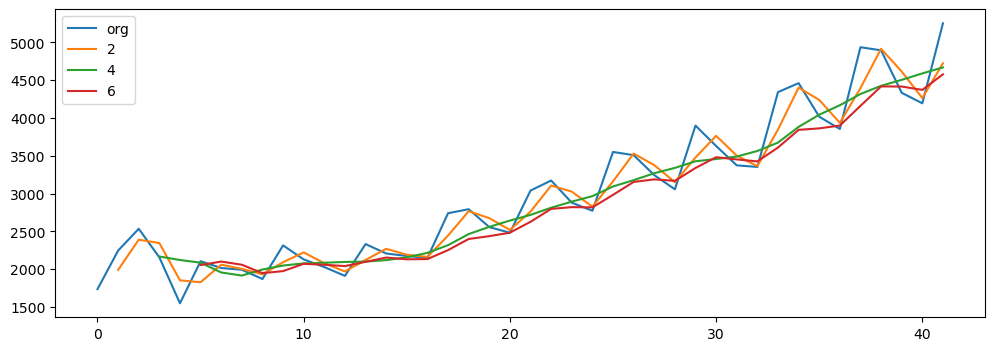

In [63]:
plt.figure(figsize=(12,4))
coca.Sales.plot(label='org')
for i in range(2,8,2):
    coca['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

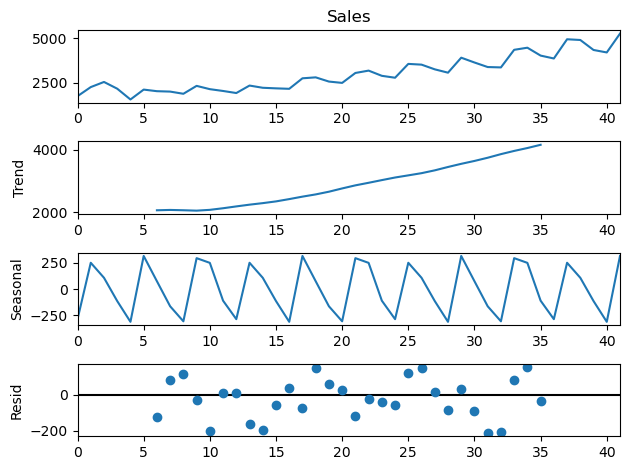

In [64]:
decompose_ts = seasonal_decompose(coca.Sales,period=12)
decompose_ts.plot()
plt.show()

In [65]:
def rmse(org,pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Method


In [66]:
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level = 0.2)
pred_ses = ses_model.predict(start = test.index[0], end= test.index[-1])
print("MAPE is : ",MAPE(pred_ses,test.Sales))
rmse_sem = rmse(test.Sales,pred_ses)
rmse_sem

MAPE is :  22.724051812293908


1172.1756457644592

# Holt Method

In [67]:
hw_model = Holt(train['Sales']).fit(smoothing_level = 0.8,smoothing_slope = 0.2)
pred_hw = hw_model.predict(start=test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hw,test.Sales))
rmse_h = rmse(test.Sales,pred_hw)

MAPE is :  16.720651186614596


# Holts winter exponential smoothing with additive seasonality and additive trend

In [68]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal='add', trend = 'add', seasonal_periods = 12).fit()
pred_hwe = hwe_model_add_add.predict(start = test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hwe,test.Sales))
rmse_haa=rmse(test.Sales,pred_hwe)

MAPE is :  13.78217390592186


# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [69]:
hwe_model_mul_add = ExponentialSmoothing(train['Sales'],seasonal = 'mul',trend = 'add', seasonal_periods = 12).fit()
pred_hma = hwe_model_mul_add.predict(start=test.index[0], end=test.index[-1])
print('MAPE is : ',MAPE(pred_hma,test.Sales))
rmse_hma = rmse(test.Sales,pred_hma)
rmse_hma

MAPE is :  12.723894662656088


604.4785009585199

In [70]:
coca['t']=np.arange(len(coca))
coca['t_squared']= coca['t']*coca['t']
coca['log_sales'] = np.log(coca['Sales'])
coca.head()

,Quarter,Sales,Quarters,Years,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,0,0,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,1,1,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,2,4,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,3,9,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,4,16,7.344602


In [71]:
train = coca.head(32)
test = coca.tail(10)

# Linear Model

In [72]:
linear_model = smf.ols('Sales~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear_model = rmse(test.Sales, pred_linear)
rmse_linear_model

752.9233932767103

# Exponential Model

In [73]:
exp = smf.ols('log_sales~t',data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = rmse(test['Sales'],np.exp(pred_exp))
rmse_exp

590.3316432076507

# Quadratic Model

In [74]:
Quad = smf.ols("Sales~t+t_squared",data=train).fit()
pred_quad = pd.Series(Quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = rmse(test.Sales,pred_quad)
rmse_quad

457.73573554074943

# Additive Seasonality Model

In [75]:
add_model = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add = pd.Series(add_model.predict(pd.DataFrame(test[['Q1','Q2','Q3']])))
rmse_add = rmse(test.Sales,pred_add)
rmse_add

1850.4665461858353

# Additive Seasonality Quadratic Model

In [76]:
adqm_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3', data = train).fit()
pred_adqm = pd.Series(adqm_model.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3']])))
rmse_adqm = rmse(test.Sales,pred_adqm)
rmse_adqm

277.35107711240363

# Multiplicative Seasoanlity Model

In [77]:
msm_model = smf.ols("log_sales~Q1+Q2+Q3",data = train).fit()
pred_msm = pd.Series(msm_model.predict(test))
rmse_msm = rmse(test.Sales,np.exp(pred_msm))
rmse_msm

1908.250394836116

# Multiplicative Additive Seasonality Model

In [78]:
mul_add_sea = smf.ols('log_sales~t+Q1+Q2+Q3', data = train).fit()
pred_mas = pd.Series(mul_add_sea.predict(test))
rmse_mas = rmse(test.Sales,np.exp(pred_mas))
rmse_mas

448.8678182691763

In [79]:
model = {'Model': pd.Series(['Simple Exponential Method','Holt Method','HW exp smoothing add','HW exp smoothing mul','Linear Model','Exp Model','Quadratic Model','Add Seasonality','Quad add seasonality','Multi Seasonality','Multi add seasonality']),
        'RMSE_Values': pd.Series([rmse_sem,rmse_h,rmse_haa,rmse_hma,rmse_linear_model,rmse_exp,rmse_quad,rmse_add,rmse_adqm,rmse_msm,rmse_mas])}

In [80]:
model = pd.DataFrame(model)

In [81]:
model.sort_values('RMSE_Values')

,Model,RMSE_Values
8,Quad add seasonality,277.351077
10,Multi add seasonality,448.867818
6,Quadratic Model,457.735736
5,Exp Model,590.331643
3,HW exp smoothing mul,604.478501
2,HW exp smoothing add,693.522153
4,Linear Model,752.923393
1,Holt Method,888.779875
0,Simple Exponential Method,1172.175646
7,Add Seasonality,1850.466546


# Building Final model with least RMSE value

In [82]:
final_model = smf.ols("Sales~t+t_squared+Q1+Q2+Q3",data = coca).fit()
pred_final= pd.Series(final_model.predict(pd.DataFrame(coca[['Q1','Q2','Q3','t','t_squared']])))
rmse_final_model = rmse(coca.Sales,pred_final)
rmse_final_model

159.0552257652247

In [83]:
pred_df = pd.DataFrame({'Actual': coca.Sales,'Predicted': pred_final})

In [84]:
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709
